<a href="https://colab.research.google.com/github/kanawanttotimetravel/AIT3001-final-project/blob/main/rnn-gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup library

In [ ]:
!pip install torch==2.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
%pip install datasets transformers evaluate torchtext
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torchau

In [ ]:
import torch
print(torch.__version__)

2.3.0+cu121


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter #! for count words
import sys
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
import torch
import torch.optim as optim
import random
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import numpy
import matplotlib.pyplot as plt
import pickle as pkl
import datasets
import os

#! for evaluation
from torchtext.data.metrics import bleu_score

from collections import Counter
import unicodedata
import re


/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
#! for tokenize
#! tokenizer

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from underthesea import word_tokenize

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
seed = 1234

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Data understanding

In [ ]:
dataset = datasets.load_dataset("harouzie/vi_en-translation")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/665 [00:00<?, ?B/s]

(…)-00000-of-00001-8fc21cb8e80d3a2d.parquet:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

(…)-00000-of-00001-858c0e989d9c5637.parquet:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

(…)-00000-of-00001-99e7e50144d1c164.parquet:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/203272 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25409 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/25409 [00:00<?, ? examples/s]

In [ ]:
train_data, test_data, valid_data = (dataset['train'], dataset['test'], dataset['valid'])

In [ ]:
train_data[0:5]

{'English': ["I heard that since Tom isn't feeling well he won't come to school today",
  'The pharmacy is on Fresno Street',
  "I'm not living with him anymore.",
  "I'll see what else we need to bring",
  'Tom ran a hundred meters in twelve seconds.'],
 'Vietnamese': ['tôi nghe nói rằng vì tom không khỏe nên hôm nay anh ấy sẽ không đến trường',
  'hiệu thuốc nằm trên đường fresno',
  'Tôi không còn sống với anh ấy nữa.',
  'tôi sẽ xem những gì chúng ta cần mang theo',
  'tom chạy một trăm mét trong mười hai giây.']}

# Data preprocessing

## Analysis data

In [ ]:
#! check number of row of data
datasetRows = 0
for key in dataset.keys():
  num_row = dataset[key].num_rows
  datasetRows += num_row
  print(f"Number of rows in {key}: {num_row}")
print(f"Total rows in dataset: {datasetRows}")

Number of rows in train: 203272
Number of rows in test: 25409
Number of rows in valid: 25409
Total rows in dataset: 254090


### What is the size of data?

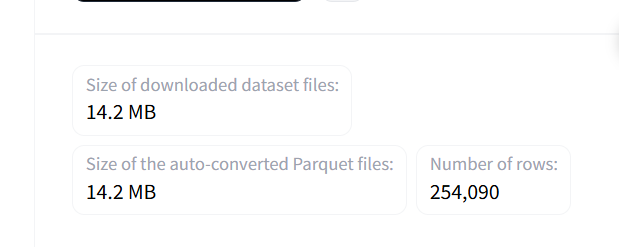

### convert data to dataframe and analysis

In [ ]:
#! convert data to dataframe
trainDf = pd.DataFrame(train_data)
testDf = pd.DataFrame(test_data)
validDf = pd.DataFrame(valid_data)

In [ ]:
'''
The log said unique which means the unique value in each column. Unique sentence!

top: the most freq value in that column
freq: the number of the most freq value in that column
'''
trainDf.describe()


,English,Vietnamese
count,203272,203272
unique,203265,196583
top,"Take a seat, please",điều đó thật tuyệt
freq,2,12


### Data preprocess and tokenizer data

In [ ]:
# Function to process text
def torch_lower_and_split_punct(text):
    '''
    This function is use for preprocess text. It include:

    - normalize text
    - tolower
    - get all valid character from a - z
    - get all valid character from . ? , !
    - remove white space from start and end
    - add start and end token at begin and end of sequence for illustrate start of sequence and end of sequence
    '''
    text = unicodedata.normalize('NFKD', text)
    text = text.lower()
    text = re.sub(r'[^ a-zđ.?!,]', '', text)
    text = re.sub(r'([.?!,])', r' \1 ', text)
    text = text.strip()
    text = f"[START] {text} [END]"
    return text

# Text vectorization class
class TextVectorization:
    '''
    This class use for vectorize text
    - __init__ function have max_vocab_size
      + vocab list
      + word_to_index list
    - func adapt(self, texts):
      + tokenizetext
      + get all tokens
      +
    '''
    def __init__(self, max_vocab_size):
        self.max_vocab_size = max_vocab_size
        self.vocab = []
        self.word_to_index = {}

    def adapt(self, texts):
        # covert sequence to token: it belike: [start], i, love, u, [end]
        tokenized_texts = [torch_lower_and_split_punct(text).split() for text in texts]

        # get all token into a list
        all_tokens = [token for tokens in tokenized_texts for token in tokens]

        # count all the token
        word_counts = Counter(all_tokens)

        # get most common token for analysis data
        most_common = word_counts.most_common(self.max_vocab_size)

        # get vocabulary of token
        self.vocab = [word for word, _ in most_common]

        # map word to index
        self.word_to_index = {word: idx for idx, word in enumerate(self.vocab)}
        print(self.word_to_index)

    def text_to_indices(self, text):
        """
        convert text into indices base on volab. Word have been map to index base on this line:

        self.word_to_index = {word: idx for idx, word in enumerate(self.vocab)}
        """
        tokens = torch_lower_and_split_punct(text).split()
        indices = [self.word_to_index.get(token, self.word_to_index['[START]']) for token in tokens]
        return indices
    def get_vocabulary(self):
        '''
        Get the vocabulary
        '''
        return self.vocab




In [ ]:
texts = [
    "I love programming you you you.",
    "You love coding.",
    "We enjoy learning machine learning .",
    "They study artificial intelligence."
]

# Initialize the TextVectorization class with a max_vocab_size of 3
vectorizer = TextVectorization(max_vocab_size=100)

# Adapt to the sample texts (this will build the vocabulary)
vectorizer.adapt(texts)
print("Vocabulary:", vectorizer.get_vocabulary())
print("Word to Index:", vectorizer.word_to_index)

{'[START]': 0, 'you': 1, '.': 2, '[END]': 3, 'love': 4, 'learning': 5, 'i': 6, 'programming': 7, 'coding': 8, 'we': 9, 'enjoy': 10, 'machine': 11, 'they': 12, 'study': 13, 'artificial': 14, 'intelligence': 15}
Vocabulary: ['[START]', 'you', '.', '[END]', 'love', 'learning', 'i', 'programming', 'coding', 'we', 'enjoy', 'machine', 'they', 'study', 'artificial', 'intelligence']
Word to Index: {'[START]': 0, 'you': 1, '.': 2, '[END]': 3, 'love': 4, 'learning': 5, 'i': 6, 'programming': 7, 'coding': 8, 'we': 9, 'enjoy': 10, 'machine': 11, 'they': 12, 'study': 13, 'artificial': 14, 'intelligence': 15}


In [ ]:
# Chuyển từ điển sang danh sách
english_texts = train_data['English']
vietnamese_texts = train_data['Vietnamese']

# Khởi tạo lớp
text_vectorizer_en = TextVectorization(max_vocab_size=5000)
text_vectorizer_vi = TextVectorization(max_vocab_size=5000)

# Xây dựng từ vựng
text_vectorizer_en.adapt(english_texts)
text_vectorizer_vi.adapt(vietnamese_texts)

# Chuyển danh sách câu thành chỉ số
indices_list_en = [text_vectorizer_en.text_to_indices(sentence) for sentence in english_texts]
#print(indices_list_en)
indices_list_vi = [text_vectorizer_vi.text_to_indices(sentence) for sentence in vietnamese_texts]
#print(indices_list_vi)

# Lấy từ vựng
vocab_en = text_vectorizer_en.get_vocabulary()
#print(vocab_en)
vocab_vi = text_vectorizer_vi.get_vocabulary()
#print(vocab_vi)


{'[START]': 0, '[END]': 1, '.': 2, 'to': 3, 'the': 4, 'i': 5, 'tom': 6, 'you': 7, 'a': 8, '?': 9, 'is': 10, 'he': 11, 'in': 12, 'of': 13, 'that': 14, ',': 15, 'was': 16, 'it': 17, 'me': 18, 'have': 19, 'this': 20, 'for': 21, 'do': 22, 'my': 23, 'we': 24, 'his': 25, 'be': 26, 'dont': 27, 'what': 28, 'on': 29, 'with': 30, 'and': 31, 'mary': 32, 'im': 33, 'are': 34, 'she': 35, 'not': 36, 'your': 37, 'at': 38, 'want': 39, 'like': 40, 'can': 41, 'know': 42, 'about': 43, 'him': 44, 'go': 45, 'were': 46, 'her': 47, 'has': 48, 'had': 49, 'out': 50, 'will': 51, 'all': 52, 'they': 53, 'as': 54, 'time': 55, 'get': 56, 'think': 57, 'there': 58, 'how': 59, 'didnt': 60, 'up': 61, 'its': 62, 'did': 63, 'here': 64, 'going': 65, 'just': 66, 'very': 67, 'cant': 68, 'if': 69, 'tell': 70, 'from': 71, 'would': 72, 'one': 73, 'when': 74, 'been': 75, 'by': 76, 'an': 77, 'ill': 78, 'no': 79, 'youre': 80, 'good': 81, 'got': 82, 'see': 83, 'help': 84, 'why': 85, 'us': 86, 'so': 87, 'need': 88, 'doesnt': 89, 'sh

In [ ]:
# Hàm để đếm tần suất n token phổ biến nhất
def get_most_common_tokens(texts,n):
    """
    texts: danh sách các chuỗi văn bản
    Trả về: danh sách 5 token phổ biến nhất và tần suất của chúng
    """
    # Tokenize tất cả các văn bản
    tokenized_texts = [torch_lower_and_split_punct(text).split() for text in texts]

    # Gom tất cả token vào một danh sách
    all_tokens = [token for tokens in tokenized_texts for token in tokens]

    # Loại bỏ các token `[START]` và `[END]` và các dấu câu
    filtered_tokens = [token for token in all_tokens if token not in ['[START]', '[END]', '.', '?', '!']]

    # Đếm tần suất xuất hiện của mỗi token
    token_counts = Counter(filtered_tokens)

    # Lấy n token xuất hiện nhiều nhất
    most_common_tokens = token_counts.most_common(n)
    return most_common_tokens

# Ví dụ sử dụng
# English texts
most_common_english_tokens = get_most_common_tokens(english_texts,n=10)
print("Top 10 tokens in English:", most_common_english_tokens)

# Vietnamese texts
most_common_vietnamese_tokens = get_most_common_tokens(vietnamese_texts,n=10)
print("Top 10 tokens in Vietnamese:", most_common_vietnamese_tokens)


Top 10 tokens in English: [('to', 51565), ('the', 51418), ('i', 47803), ('tom', 42833), ('you', 37857), ('a', 32305), ('is', 23403), ('he', 17222), ('in', 16493), ('of', 15972)]
Top 10 tokens in Vietnamese: [('toi', 94931), ('ban', 53761), ('co', 50277), ('khong', 46242), ('tom', 44356), ('mot', 31303), ('đa', 30078), ('anh', 27051), ('cua', 26294), ('la', 23270)]


Top 10 tokens in English: [('to', 51565), ('the', 51418), ('i', 47803), ('tom', 42833), ('you', 37857), ('a', 32305), ('is', 23403), ('he', 17222), ('in', 16493), ('of', 15972)]


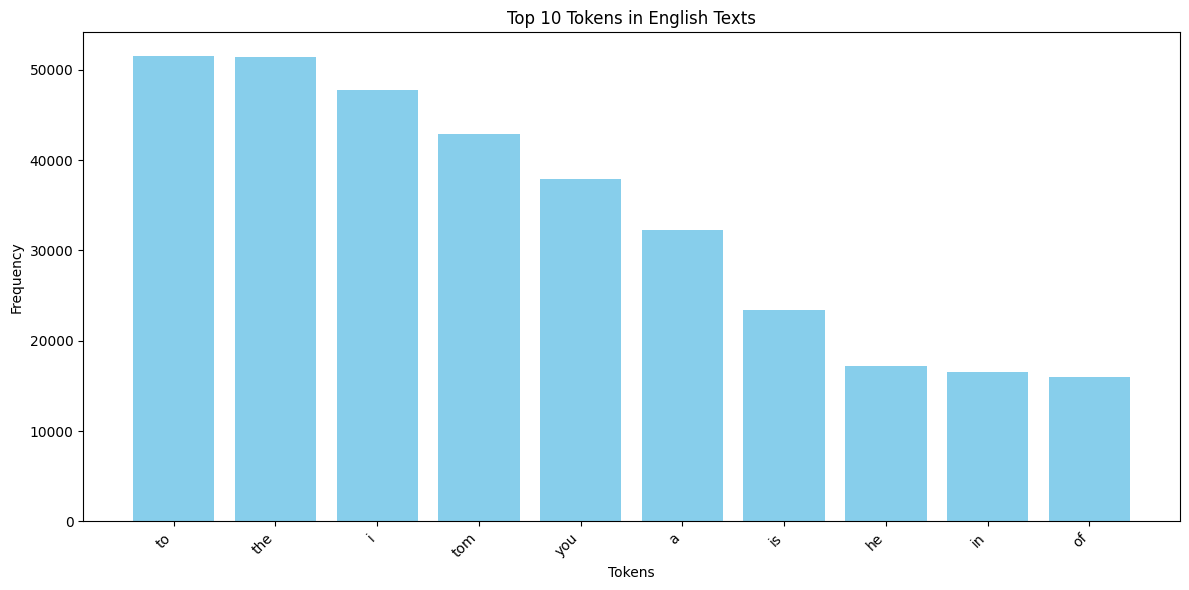

Top 10 tokens in Vietnamese: [('toi', 94931), ('ban', 53761), ('co', 50277), ('khong', 46242), ('tom', 44356), ('mot', 31303), ('đa', 30078), ('anh', 27051), ('cua', 26294), ('la', 23270)]


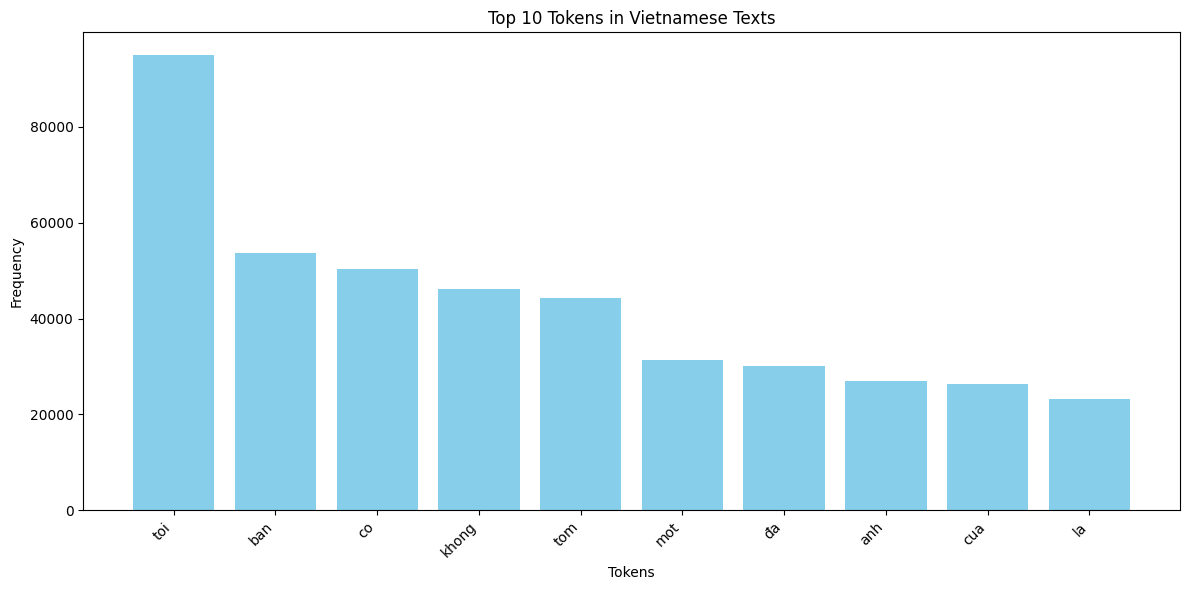

In [ ]:
# Hàm vẽ biểu đồ
def plot_top_tokens(top_tokens, title="Top Tokens Frequency"):
    """
    top_tokens: danh sách các tuple (token, frequency)
    title: tiêu đề của biểu đồ
    """
    tokens, frequencies = zip(*top_tokens)  # Tách token và tần suất
    plt.figure(figsize=(12, 6))
    plt.bar(tokens, frequencies, color='skyblue')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Xoay nhãn token để dễ đọc
    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng
# Lấy 20 token phổ biến nhất từ English texts
top_english_tokens = get_most_common_tokens(english_texts,n=10)
print("Top 10 tokens in English:", top_english_tokens)

# Vẽ biểu đồ cho English texts
plot_top_tokens(top_english_tokens, title="Top 10 Tokens in English Texts")

# Lấy 20 token phổ biến nhất từ Vietnamese texts
top_vietnamese_tokens = get_most_common_tokens(vietnamese_texts,n=10)
print("Top 10 tokens in Vietnamese:", top_vietnamese_tokens)

# Vẽ biểu đồ cho Vietnamese texts
plot_top_tokens(top_vietnamese_tokens, title="Top 10 Tokens in Vietnamese Texts")


Average sentence length in English: 9.41 words


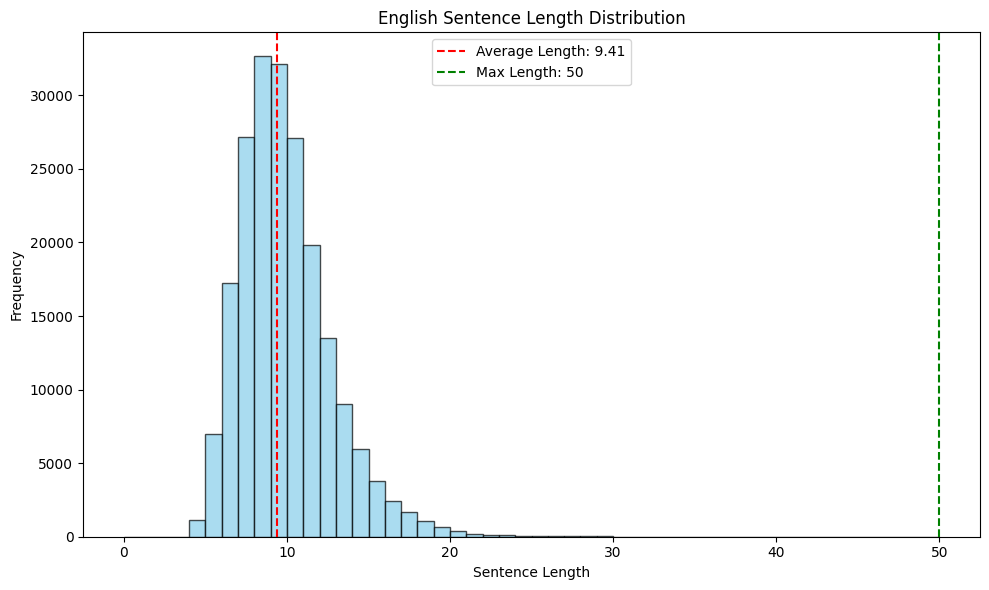

Average sentence length in Vietnamese: 10.86 words


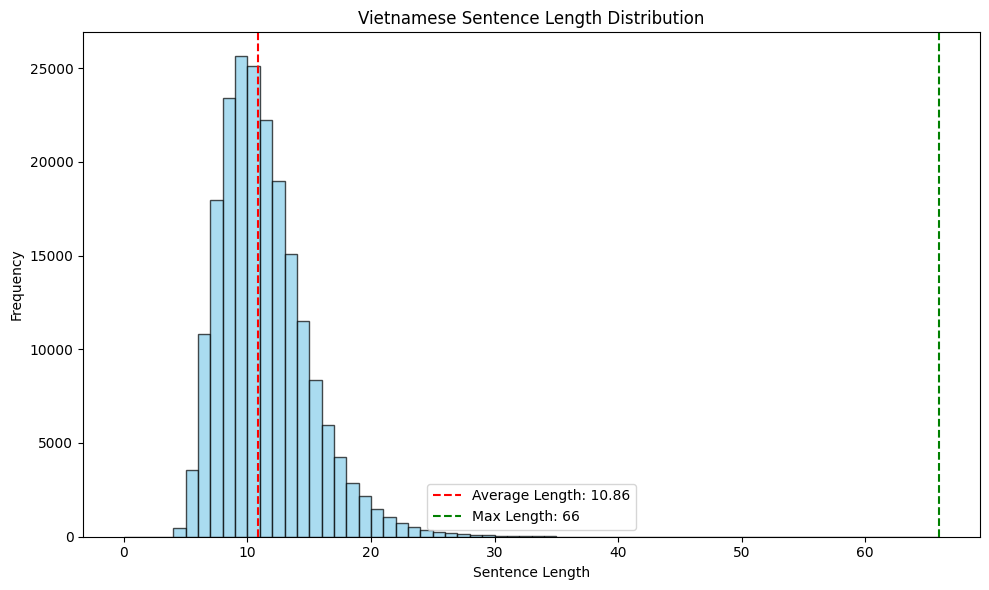

In [ ]:
import matplotlib.pyplot as plt

# Hàm tính độ dài của một câu
def calculate_sentence_lengths(texts):
    """
    texts: danh sách các câu (chuỗi)
    Trả về: danh sách độ dài của từng câu
    """
    sentence_lengths = [len(torch_lower_and_split_punct(text).split()) for text in texts]
    return sentence_lengths

# Hàm tính độ dài trung bình
def calculate_average_length(lengths):
    """
    lengths: danh sách độ dài các câu
    Trả về: độ dài trung bình
    """
    return sum(lengths) / len(lengths)

# Hàm vẽ histogram
def plot_sentence_lengths_histogram(sentence_lengths, average_length, title="Sentence Length Distribution"):
    """
    sentence_lengths: danh sách độ dài các câu
    average_length: độ dài trung bình
    title: tiêu đề biểu đồ
    """
    plt.figure(figsize=(10, 6))
    # Vẽ histogram
    plt.hist(sentence_lengths, bins=range(0, max(sentence_lengths) + 1, 1), color='skyblue', edgecolor='black', alpha=0.7)

    # Vẽ đường trung bình
    plt.axvline(x=average_length, color='red', linestyle='--', label=f'Average Length: {average_length:.2f}')

    # Vẽ đường biểu thị độ dài lớn nhất (tuỳ chọn)
    max_length = max(sentence_lengths)
    plt.axvline(x=max_length, color='green', linestyle='--', label=f'Max Length: {max_length}')

    # Cấu hình biểu đồ
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tính toán và vẽ biểu đồ cho English texts
english_lengths = calculate_sentence_lengths(english_texts)
english_average = calculate_average_length(english_lengths)
print(f"Average sentence length in English: {english_average:.2f} words")

plot_sentence_lengths_histogram(english_lengths, english_average, title="English Sentence Length Distribution")

# Tính toán và vẽ biểu đồ cho Vietnamese texts
vietnamese_lengths = calculate_sentence_lengths(train_data['Vietnamese'])
vietnamese_average = calculate_average_length(vietnamese_lengths)
print(f"Average sentence length in Vietnamese: {vietnamese_average:.2f} words")

plot_sentence_lengths_histogram(vietnamese_lengths, vietnamese_average, title="Vietnamese Sentence Length Distribution")


# Encoder Decoder and Model

### Why use GRU but not RNN?

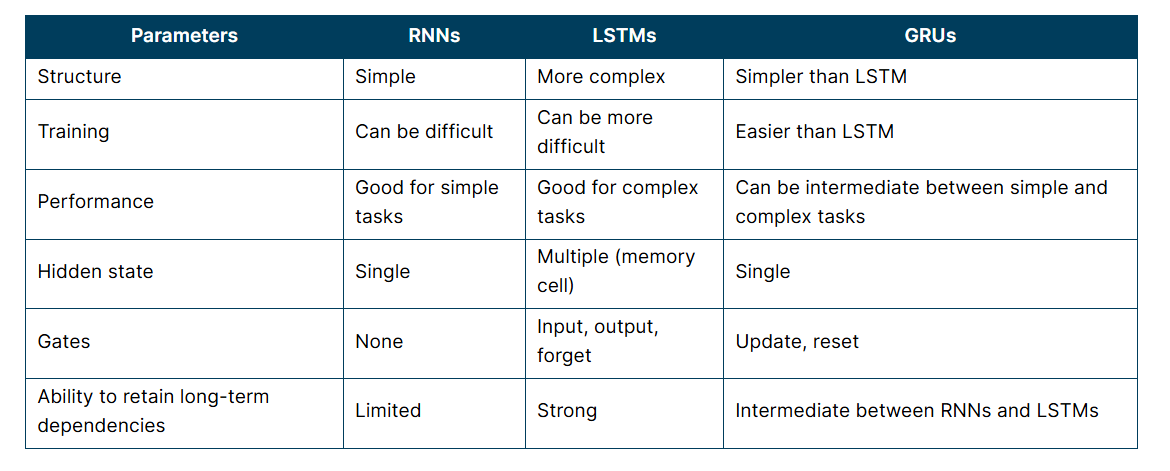

### Encoder, Decoder and Model implementation

In [ ]:
# Encoder implementation
class Encoder(nn.Module):
    '''
    Encoder model include:
    - embedding layer <input_vocab_size, embedding_dim> turn vector of indices of a word into a vector of embedding
    ex: "i": 5 -> [0.3,0.2,...,0.45] (1 x embedding_dimension)
    - GRU layer <embedding_dim, enc_units>: enc_units: number of features in hidden state
    '''
    def __init__(self, input_vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.embedding = nn.Embedding(input_vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, enc_units, batch_first=True)

    def forward(self, tokens, state=None):
        # vectorize token
        vectors = self.embedding(tokens)
        # put token into gru layer
        output, state = self.gru(vectors, state)

        return output, state


class LuongAttention(nn.Module):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        self.attn = nn.Linear(units, units, bias=False)

    def forward(self, query, value, mask=None):
        #print(f"query.shape: {query.shape}")
        #print(f"value.shape: {value.shape}")
        # Compute attention score use dot product
        # query.shape: [batch_size, seq_len_query, units]
        # value.shape: [batch_size, seq_len_value, units]
        # attn_weights.shape: [batch_size, seq_len_query, seq_len_value]

        # torch.bmm to multiply matrix
        attn_weights = torch.bmm(query, value.transpose(1, 2))  # [batch_size, seq_len, seq_len]

        if mask is not None:
            attn_weights = attn_weights.masked_fill(mask.unsqueeze(1), -float('inf'))

        attention_weights = torch.softmax(attn_weights, dim=-1)  # [batch_size, seq_len, seq_len]

        # Normalize the attention score using softmax over the last dimension (seq_len_value).
        # This ensures the attention weights for each query sum to 1.
        # attention_weights: [batch_size, seq_len_query, seq_len_value]
        context_vector = torch.bmm(attention_weights, value)  # [batch_size, seq_len, units]

        return context_vector, attention_weights

# Decoder implementation
class Decoder(nn.Module):
    def __init__(self, output_vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.output_vocab_size = output_vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = nn.Embedding(output_vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, dec_units, batch_first=True)
        self.attention = LuongAttention(dec_units)
        self.Wc = nn.Linear(dec_units, dec_units)
        self.fc = nn.Linear(dec_units, output_vocab_size)

    def forward(self, tokens, enc_output, hidden_state, mask):
        # from token to vector
        vectors = self.embedding(tokens)
        # apply gru layer
        gru_output, hidden_state = self.gru(vectors, hidden_state)

        context_vector, attention_weights = self.attention(query=gru_output, value=enc_output, mask=mask)
        combined = torch.tanh(self.Wc(context_vector + gru_output))
        logits = self.fc(combined)

        #print("logits decoder: {}".format(logits))
        return logits, hidden_state, attention_weights
class Seq2SeqModel(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2SeqModel, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target, mask=None):
        # Source is passed to the encoder
        enc_output, enc_state = self.encoder(source)

        # Initialize the decoder's hidden state with the encoder's final state
        dec_input = target[:, :-1]  # Removing the last token (for teacher forcing)
        dec_output, dec_state, attention_weights = self.decoder(dec_input, enc_output, enc_state, mask)

        return dec_output


# Prepare data to put into train

### hyperparameter tunning

In [ ]:
LEARNING_RATE = 1e-4
NUM_EPOCHS = 80
BATCH_SIZE = 64
MAX_VOCAB_SIZE = 10000 #! can adjust embedding layer input size
PADDING_VALUE = 0
EMBEDDING_DIM = 256
ENCODER_UNITS = 512
DECODER_UNITS = 512

In [ ]:
#NOTE: Adapt text vectorization:
train_text = trainDf['English'].tolist()
train_target = trainDf['Vietnamese'].tolist()

textVectorizer = TextVectorization(max_vocab_size=MAX_VOCAB_SIZE)
textVectorizer.adapt(train_text + train_target)

#NOTE create dataloader for put into train model
class Seq2SeqDataset(torch.utils.data.Dataset):
    def __init__(self, source_texts, target_texts, text_vectorizer):
        self.source_texts = source_texts
        self.target_texts = target_texts
        self.text_vectorizer = text_vectorizer

    def __len__(self):
        return len(self.source_texts)

    def __getitem__(self, idx):
        '''
        return tensor representation of source token and target token
        '''
        source_tokens = self.text_vectorizer.text_to_indices(self.source_texts[idx])
        target_tokens = self.text_vectorizer.text_to_indices(self.target_texts[idx])

        # Apply padding to make all sequences the same length
        source_tokens = torch.tensor(source_tokens)
        target_tokens = torch.tensor(target_tokens)

        return source_tokens, target_tokens
def pad_sequence_function(batch):
  '''
  pad sequence to makesure every sequence have same size
  '''
  input_seqs, target_seqs = zip(*batch)

  # Pad both input and target sequences
  input_seqs_padded = pad_sequence(input_seqs, padding_value=PADDING_VALUE, batch_first=True)
  target_seqs_padded = pad_sequence(target_seqs, padding_value=PADDING_VALUE, batch_first=True)

  return input_seqs_padded, target_seqs_padded

#Note: create data for train, valid, test
train_dataset = Seq2SeqDataset(train_text, train_target, textVectorizer)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn = pad_sequence_function)


valid_texts = validDf['English'].tolist()
valid_target_texts = validDf['Vietnamese'].tolist()
valid_dataset = Seq2SeqDataset(valid_texts, valid_target_texts, textVectorizer)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn = pad_sequence_function)

test_texts = testDf['English'].tolist()
test_target_texts = testDf['Vietnamese'].tolist()
test_dataset = Seq2SeqDataset(test_texts, test_target_texts, textVectorizer)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn = pad_sequence_function)


#NOTE: setup model:
# Initialize the encoder and decoder
encoder = Encoder(input_vocab_size=len(textVectorizer.vocab), embedding_dim=EMBEDDING_DIM, enc_units=ENCODER_UNITS)
decoder = Decoder(output_vocab_size=len(textVectorizer.vocab), embedding_dim=EMBEDDING_DIM, dec_units=DECODER_UNITS)

# Initialize the Seq2Seq model



{'[START]': 0, '[END]': 1, '.': 2, 'toi': 3, 'tom': 4, 'the': 5, 'ban': 6, 'to': 7, 'co': 8, 'i': 9, '?': 10, 'khong': 11, 'you': 12, 'a': 13, 'mot': 14, 'đa': 15, 'anh': 16, ',': 17, 'cua': 18, 'is': 19, 'la': 20, 'ay': 21, 'đo': 22, 'chung': 23, 'that': 24, 'he': 25, 'se': 26, 'noi': 27, 'lam': 28, 'in': 29, 'cho': 30, 'voi': 31, 'of': 32, 'mary': 33, 'gi': 34, 'it': 35, 'was': 36, 'me': 37, 'đe': 38, 'nay': 39, 'no': 40, 'trong': 41, 'o': 42, 'ta': 43, 'đen': 44, 'do': 45, 'have': 46, 'muon': 47, 'can': 48, 'this': 49, 'for': 50, 'đang': 51, 'đi': 52, 'nhung': 53, 'be': 54, 'my': 55, 'đieu': 56, 'nguoi': 57, 've': 58, 'on': 59, 'phai': 60, 'we': 61, 'biet': 62, 'his': 63, 'nghi': 64, 'dont': 65, 'an': 66, 'what': 67, 'khi': 68, 'đuoc': 69, 'rang': 70, 'im': 71, 'ho': 72, 'with': 73, 'and': 74, 'va': 75, 'so': 76, 'thay': 77, 'are': 78, 'vao': 79, 'ra': 80, 'tu': 81, 'she': 82, 'not': 83, 'rat': 84, 'đay': 85, 'gio': 86, 'su': 87, 'moi': 88, 'bao': 89, 'your': 90, 'minh': 91, 'at': 9

In [ ]:
model = Seq2SeqModel(encoder, decoder)
print(model)

Seq2SeqModel(
  (encoder): Encoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
    (attention): LuongAttention(
      (attn): Linear(in_features=512, out_features=512, bias=False)
    )
    (Wc): Linear(in_features=512, out_features=512, bias=True)
    (fc): Linear(in_features=512, out_features=10000, bias=True)
  )
)


In [ ]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of trainable parameters: {num_params}")

Number of trainable parameters: 13140240


# Begin training

In [ ]:
#NOTE: training:

model = Seq2SeqModel(encoder, decoder)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=0)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
allTrainLoss = []
allValidationLoss = []


# Training function
def train(model, train_loader, valid_loader, num_epochs=NUM_EPOCHS, device=device):
    #NOTE: model in train mode
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        model.train()
        for source, target in train_loader:
            source, target = source.to(device), target.to(device)

            optimizer.zero_grad()

            # for debuging purpuse only
            if torch.isnan(source).any() or torch.isinf(source).any():
                print("NaN or Inf found in source!")
            if torch.isnan(target).any() or torch.isinf(target).any():
                print("NaN or Inf found in target!")

            # Forward pass through the model
            output = model(source, target)

            # for debuging purpuse only
            if torch.isnan(output).any() or torch.isinf(output).any():
                print("NaN or Inf found in output!")

            # compute loss for output and target
            #output: (batch_size, seq_len, vocab_size)
            # target: (batch_size, seq_len)
            # output: reshape to <batch_size * seq_len, volab_size>
            # target: reshape to <batch_size * seq_Len, >
            loss = criterion(output.view(-1, output.size(-1)), target[:, 1:].contiguous().view(-1)) # f(predict, label)
            #print("current loss: {}".format(loss))

            # back propagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
            optimizer.step()

            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(train_loader)
        allTrainLoss.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}")

        # Evaluate after each epoch
        valid_loss = evaluate(model, valid_loader, criterion, device)
        allValidationLoss.append(valid_loss)
        print(f"Validation Loss: {valid_loss:.4f}")

# Evaluation function
allEvalLoss = []
def evaluate(model, valid_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for source, target in valid_loader:
            source, target = source.to(device), target.to(device)
            output = model(source, target)

            # Compute loss (ignoring padding tokens)
            loss = criterion(output.view(-1, output.size(-1)), target[:, 1:].contiguous().view(-1))

            total_loss += loss.item()

    return total_loss / len(valid_loader)

# Train the model
train(model, train_loader, valid_loader, num_epochs=NUM_EPOCHS, device=device)


Epoch 1/80, Loss: 3.8984
Validation Loss: 3.0618
Epoch 2/80, Loss: 2.6987
Validation Loss: 2.4568
Epoch 3/80, Loss: 2.2233
Validation Loss: 2.1108
Epoch 4/80, Loss: 1.9289
Validation Loss: 1.9015
Epoch 5/80, Loss: 1.7197
Validation Loss: 1.7467
Epoch 6/80, Loss: 1.5602
Validation Loss: 1.6353
Epoch 7/80, Loss: 1.4333
Validation Loss: 1.5527
Epoch 8/80, Loss: 1.3279
Validation Loss: 1.4869
Epoch 9/80, Loss: 1.2389
Validation Loss: 1.4304
Epoch 10/80, Loss: 1.1617
Validation Loss: 1.3927
Epoch 11/80, Loss: 1.0932
Validation Loss: 1.3602
Epoch 12/80, Loss: 1.0321
Validation Loss: 1.3322
Epoch 13/80, Loss: 0.9770
Validation Loss: 1.3125
Epoch 14/80, Loss: 0.9264
Validation Loss: 1.2952
Epoch 15/80, Loss: 0.8794
Validation Loss: 1.2855
Epoch 16/80, Loss: 0.8365
Validation Loss: 1.2757
Epoch 17/80, Loss: 0.7960
Validation Loss: 1.2702
Epoch 18/80, Loss: 0.7579
Validation Loss: 1.2646
Epoch 19/80, Loss: 0.7223
Validation Loss: 1.2701
Epoch 20/80, Loss: 0.6884
Validation Loss: 1.2724
Epoch 21/

### analysis train and eval procedure

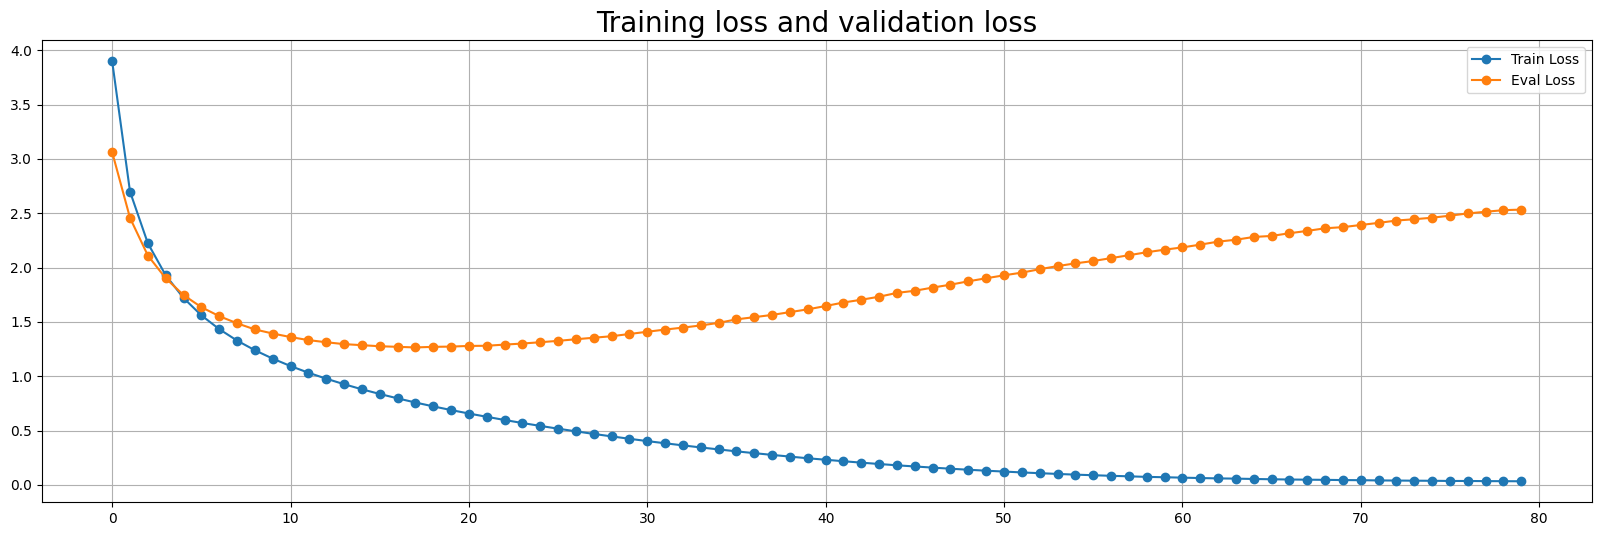

In [ ]:
x = [i for i in range(len(allTrainLoss))]
y = [i for i in range(len(allValidationLoss))]

plt.figure(figsize=(20,6))
plt.title("Training loss and validation loss",size=20)
plt.plot(x, allTrainLoss, label="Train Loss", marker='o')
plt.plot(y, allValidationLoss, label="Eval Loss", marker = 'o')
plt.legend()
plt.grid()






In [ ]:
#!HIGHLY NOTE: this cell for debuging model purpose only!
# sequence_length = 500
# batch_size = 32
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# dummy_input = torch.randint(0, 100, (batch_size, sequence_length)).to(device)
# dummy_target = torch.randint(0, 100, (batch_size, sequence_length)).to(device)
# output = model(dummy_input, dummy_target)
# output

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), "seq2seq_model.pth")

model = Seq2SeqModel(encoder, decoder)

# Load the model's state_dict
model.load_state_dict(torch.load("seq2seq_model.pth"))

# Move the model to the appropriate device
model.to(device)


Seq2SeqModel(
  (encoder): Encoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
    (attention): LuongAttention(
      (attn): Linear(in_features=512, out_features=512, bias=False)
    )
    (Wc): Linear(in_features=512, out_features=512, bias=True)
    (fc): Linear(in_features=512, out_features=10000, bias=True)
  )
)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Seq2SeqModel(encoder, decoder)  # Replace this with your actual model instantiation

# Load the model's state_dict
#! NOTE: if you are using cuda, un comment this line:
#model.load_state_dict(torch.load("seq2seq_model.pth"))
model.load_state_dict(torch.load("seq2seq_model.pth", map_location=torch.device(device)))

model.to(device)

Seq2SeqModel(
  (encoder): Encoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(10000, 256)
    (gru): GRU(256, 512, batch_first=True)
    (attention): LuongAttention(
      (attn): Linear(in_features=512, out_features=512, bias=False)
    )
    (Wc): Linear(in_features=512, out_features=512, bias=True)
    (fc): Linear(in_features=512, out_features=10000, bias=True)
  )
)

# Bleu score and Evaluate model

In [ ]:
import torch
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction


def generate_predictions(model, data_loader, text_vectorizer, device):
    model.eval()
    predictions = []
    references = []
    sos_token = text_vectorizer.word_to_index['[START]']
    eos_token = text_vectorizer.word_to_index['[END]']

    with torch.no_grad():
        for source_tokens, target_tokens in data_loader:
            source_tokens = source_tokens.to(device)
            target_tokens = target_tokens.to(device)


            enc_output, enc_state = model.encoder(source_tokens)


            dec_input = torch.full((source_tokens.size(0), 1), sos_token, dtype=torch.long, device=device)
            dec_state = enc_state
            predicted_sentences = []

            for _ in range(target_tokens.size(1)):
                logits, dec_state, _ = model.decoder(dec_input, enc_output, dec_state, mask=None)
                predicted_token = logits.argmax(dim=-1)
                predicted_sentences.append(predicted_token)
                dec_input = predicted_token


            predicted_sentences = torch.cat(predicted_sentences, dim=1).cpu().tolist()
            for pred, ref in zip(predicted_sentences, target_tokens.cpu().tolist()):

                if eos_token in pred:
                    pred = pred[:pred.index(eos_token)]
                predictions.append(pred)

                if eos_token in ref:
                    ref = ref[:ref.index(eos_token)]
                references.append([ref])

    return predictions, references


def compute_bleu_score(predictions, references, text_vectorizer):
    bleu_scores = []
    # add smooth build in function for bleu score
    smoothing_function = SmoothingFunction().method1  # add smooth for BLEU

    for pred_tokens, ref_tokens in zip(predictions, references):
        # convert indices to words for both predictions and references
        pred_sentence = [text_vectorizer.vocab[idx] for idx in pred_tokens if idx < len(text_vectorizer.vocab)]
        # double for loop in reference sentence
        ref_sentences = [[text_vectorizer.vocab[idx] for idx in ref if idx < len(text_vectorizer.vocab)] for ref in ref_tokens]

        # compute BLEU score for the sentence
        bleu = sentence_bleu(ref_sentences, pred_sentence, smoothing_function=smoothing_function)
        bleu_scores.append(bleu)

    # return the average BLEU score
    return sum(bleu_scores) / len(bleu_scores)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Seq2SeqModel(encoder, decoder).to(device)


predictions, references = generate_predictions(model, test_loader, textVectorizer, device)
bleu_score = compute_bleu_score(predictions, references, textVectorizer)
print(f"BLEU Score: {bleu_score:.4f}")


BLEU Score: 0.3478


In [ ]:
import random

def predict_sentence(model, sentence, text_vectorizer, device):
    """
    Takes a random sentence, tokenizes it, and generates a prediction using the model.

    Args:
        model: The trained Seq2Seq model.
        sentence: The input sentence (source language).
        text_vectorizer: The TextVectorization instance used for processing text.
        device: The device on which the model is running (CPU or GPU).

    Returns:
        The original sentence, model's predicted sentence, and the input tokens.
    """
    model.eval()  # Set the model to evaluation mode

    # tokenize the input sentence
    tokenized_sentence = text_vectorizer.text_to_indices(sentence)
    input_tokens = torch.tensor(tokenized_sentence, dtype=torch.long).unsqueeze(0).to(device)

    # encode the input sentence
    with torch.no_grad():
        enc_output, enc_state = model.encoder(input_tokens)

    # initialize the decoder with the <START> token
    sos_token = text_vectorizer.word_to_index['[START]']
    eos_token = text_vectorizer.word_to_index['[END]']
    dec_input = torch.tensor([[sos_token]], dtype=torch.long, device=device)
    dec_state = enc_state

    predicted_tokens = []
    max_length = 50  #max length of prediction

    # decode the sequence token by token
    for _ in range(max_length):
        with torch.no_grad():
            logits, dec_state, _ = model.decoder(dec_input, enc_output, dec_state, mask=None)
        predicted_token = logits.argmax(dim=-1).item()

        # mark end of sequence
        if predicted_token == eos_token:
            break
        predicted_tokens.append(predicted_token)
        dec_input = torch.tensor([[predicted_token]], dtype=torch.long, device=device)

    # convert tokenized predictions back to words
    predicted_sentence = " ".join([text_vectorizer.vocab[token] for token in predicted_tokens if token < len(text_vectorizer.vocab)])

    return sentence, predicted_sentence, tokenized_sentence

#random_sentence = random.choice(trainDf['English'].tolist())
random_sentence = "You are so stupid"


# generate prediction
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Seq2SeqModel(encoder, decoder).to(device)
original_sentence, predicted_sentence, tokenized_input = predict_sentence(
    model=model,
    sentence=random_sentence,
    text_vectorizer=textVectorizer,
    device=device
)

print(f"Original Sentence: {original_sentence}")
# print(f"Tokenized Input: {tokenized_input}")
print(f"Predicted Sentence: {predicted_sentence}")


Original Sentence: You are so stupid
Predicted Sentence: ban that ngoc
